In [1]:
# imports
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Plotting Settings
def plot_mem(mem, title=False):
  if title:
    plt.title(title)
  plt.plot(mem)
  plt.xlabel("Time step")
  plt.ylabel("Membrane Potential")
  plt.xlim([0, 50])
  plt.ylim([0, 1])
  plt.show()

def plot_step_current_response(cur_in, mem_rec, vline1):
  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur_in, c="tab:orange")
  ax[0].set_ylim([0, 0.2])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title("Lapicque's Neuron Model With Step Input")

  # Plot membrane potential
  ax[1].plot(mem_rec)
  ax[1].set_ylim([0, 0.6]) 
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  if vline1:
    ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.xlabel("Time step")

  plt.show()


def plot_current_pulse_response(cur_in, mem_rec, title, vline1=False, vline2=False, ylim_max1=False):

  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur_in, c="tab:orange")
  if not ylim_max1:
    ax[0].set_ylim([0, 0.2])
  else:
    ax[0].set_ylim([0, ylim_max1])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem_rec)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  if vline1:
    ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  if vline2:
    ax[1].axvline(x=vline2, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.xlabel("Time step")

  plt.show()

def compare_plots(cur1, cur2, cur3, mem1, mem2, mem3, vline1, vline2, vline3, vline4, title):
  # Generate Plots
  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur1)
  ax[0].plot(cur2)
  ax[0].plot(cur3)
  ax[0].set_ylim([0, 0.2])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem1)
  ax[1].plot(mem2)
  ax[1].plot(mem3)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline2, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline3, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline4, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)

  plt.xlabel("Time step")

  plt.show()

def plot_cur_mem_spk(cur, mem, spk, thr_line=False, vline=False, title=False, ylim_max2=1.25):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input current
  ax[0].plot(cur, c="tab:orange")
  ax[0].set_ylim([0, 0.4])
  ax[0].set_xlim([0, 200])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  if title:
    ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, ylim_max2]) 
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
  if thr_line:
    ax[1].axhline(y=thr_line, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk, ax[2], s=400, c="black", marker="|")
  if vline:
    ax[2].axvline(x=vline, ymin=0, ymax=6.75, alpha = 0.15, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.ylabel("Output spikes")
  plt.yticks([]) 

  plt.show()

def plot_spk_mem_spk(spk_in, mem, spk_rec, title):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [0.4, 1, 0.4]})

  # Plot input current
  splt.raster(spk_in, ax[0], s=400, c="black", marker="|")
  ax[0].set_ylabel("Input Spikes")
  ax[0].set_title(title)
  plt.yticks([]) 

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
  ax[1].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk_rec, ax[2], s=400, c="black", marker="|")
  plt.ylabel("Output spikes")
  plt.yticks([]) 

  plt.show()


def plot_reset_comparison(spk_in, mem_rec, spk_rec, mem_rec0, spk_rec0):
  # Generate Plots to Compare Reset Mechanisms
  fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [0.4, 1, 0.4], 'wspace':0.05})

  # Reset by Subtraction: input spikes
  splt.raster(spk_in, ax[0][0], s=400, c="black", marker="|")
  ax[0][0].set_ylabel("Input Spikes")
  ax[0][0].set_title("Reset by Subtraction")
  ax[0][0].set_yticks([])

  # Reset by Subtraction: membrane potential 
  ax[1][0].plot(mem_rec)
  ax[1][0].set_ylim([0, 0.7])
  ax[1][0].set_ylabel("Membrane Potential ($U_{mem}$)")
  ax[1][0].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)

  # Reset by Subtraction: output spikes
  splt.raster(spk_rec, ax[2][0], s=400, c="black", marker="|")
  ax[2][0].set_yticks([])
  ax[2][0].set_xlabel("Time step")
  ax[2][0].set_ylabel("Output Spikes")

  # Reset to Zero: input spikes
  splt.raster(spk_in, ax[0][1], s=400, c="black", marker="|")
  ax[0][1].set_title("Reset to Zero")
  ax[0][1].set_yticks([])

  # Reset to Zero: membrane potential
  ax[1][1].plot(mem_rec0)
  ax[1][1].set_ylim([0, 0.7])
  ax[1][1].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  ax[1][1].set_yticks([])
  ax[2][1].set_xlabel("Time step")

  # Reset to Zero: output spikes
  splt.raster(spk_rec0, ax[2][1], s=400, c="black", marker="|")
  ax[2][1].set_yticks([])

  plt.show()

In [3]:
def leaky_integrate_neuron(U, time_step=1e-3, I=0, R=5e7, C=1e-10):
    tau = R*C 
    U = U + (time_step/tau*(-U+R*I))
    return U


In [4]:
U = 0.9
value = U
values = [] 
time_step = 0.25e-3
for i in range(0,100):
    value = leaky_integrate_neuron(U=value, time_step=time_step)
    values.append(value)

In [5]:
num_steps = 100
U = 0.9
U_trace = []  # keeps a record of U for plotting

for step in range(num_steps):
  U_trace.append(U)
  U = leaky_integrate_neuron(U)  # solve next step of U



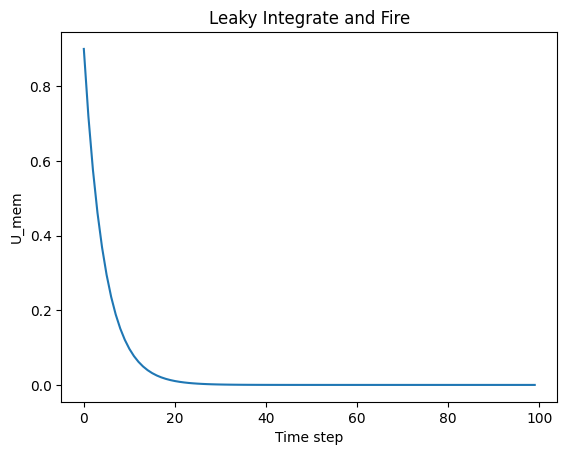

In [6]:
plt.plot(U_trace)

plt.title("Leaky Integrate and Fire")
plt.xlabel("Time step")
plt.ylabel("U_mem")
plt.show()

In [7]:
time_step = 1e-3
R = 5
C = 1e-3

# leaky integrate and fire neuron

lif1 = snn.Lapicque(R=R, C=C, time_step=time_step)

In [8]:
# Initialize membrane, input, and output
mem = torch.ones(1) * 0.9  # U=0.9 at t=0
cur_in = torch.zeros(num_steps, 1)  # I=0 for all t
spk_out = torch.zeros(1)  # initialize output spikes

# these are just initial values for time t = 0



In [9]:
# create a list mem_rec to record values of mem at every step
mem_rec = [mem]

In [10]:
# now loop over and update mem each time, store it in mem_rec

for step in range(num_steps):
    spk_out, mem = lif1(cur_in[step], mem)
    # so this is saying spk_out and mem are equal to the outputs of lapicque, and give it the inputs it needs
    mem_rec.append(mem)


In [11]:

# convert the list of tensors to into one tensor
mem_rec = torch.stack(mem_rec)

# i don't understand what this does 
# now i do: at first it is a list of 100 vectors next to each other. now we stack them into a tensor. 


Text(0, 0.5, 'Membrane Potential')

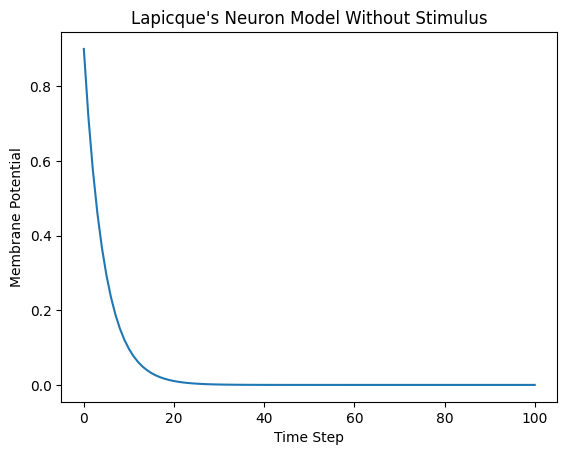

In [12]:
plt.plot(mem_rec)
plt.title("Lapicque's Neuron Model Without Stimulus")
plt.xlabel("Time Step")
plt.ylabel("Membrane Potential")

In [13]:
# intialise input current pulse
cur_in = torch.cat((torch.zeros(10,1), torch.ones(190, 1)*0.1), 0) # input current turns on at t=10
#mem = 0
# what is the difference between torch cat and torch stack?

# initialise membrane, output and recordings
mem = torch.zeros(1) # membrane potential of 0 at t=0
spk_out = torch.zeros(1) # neuron needs somewhere to sequentially dump its output spikes
mem_rec = [mem]

Text(0.5, 0, 'Time step')

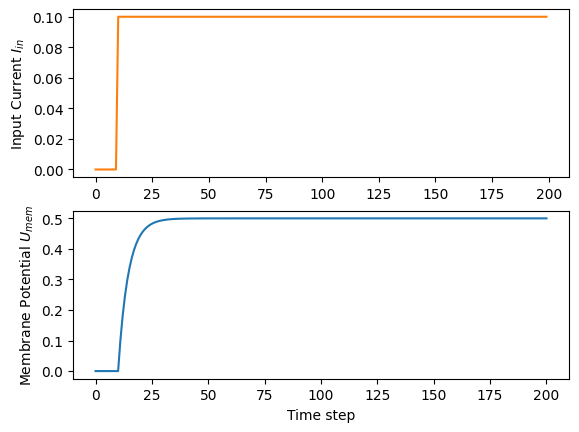

In [14]:
num_steps = 200

# pass updated value of mem and cur_in[step] at every time step 
for step in range(num_steps):
    spk_out, mem = lif1(cur_in[step], mem)
    mem_rec.append(mem)

# crunch -list- of tensors into one tensor
mem_rec = torch.stack(mem_rec)

fig, axs = plt.subplots(2, 1)

axs[0].plot(cur_in, color="tab:orange")
axs[0].set_ylabel("Input Current $I_{in}$")

axs[1].plot(mem_rec, color="tab:blue")
axs[1].set_ylabel("Membrane Potential $U_{mem}$")
axs[1].set_xlabel("Time step")

In [15]:
print(f"The calculated value of input pulse [A] x resistance [Ω] is: {cur_in[11]*lif1.R} V")
print(f"The simulated value of steady-state membrane potential is: {mem_rec[200][0]} V")

The calculated value of input pulse [A] x resistance [Ω] is: tensor([0.5000]) V
The simulated value of steady-state membrane potential is: 0.4999999403953552 V


# Pulse Input

In [16]:
# initialise current pulse, membrane, and outputs
cur_in1 = torch.cat((torch.zeros(10,1), torch.ones(20,1)*(0.1), torch.zeros(170,1)),0)
# input turns on at t=10, off at t=30
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec1 = [mem]

In [17]:
# neuron simulation

for step in range(num_steps):
    spk_out, mem = lif1(cur_in1[step], mem)
    mem_rec1.append(mem)

In [18]:
mem_rec1 = torch.stack(mem_rec1)

Text(0.5, 0, 'Time step')

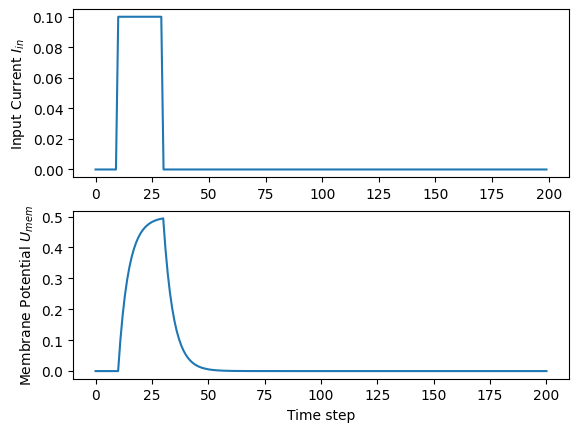

In [19]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(cur_in1)
axs[1].plot(mem_rec1)


axs[0].set_ylabel("Input Current $I_{in}$")

axs[1].set_ylabel("Membrane Potential $U_{mem}$")
axs[1].set_xlabel("Time step")

Text(0.5, 0.98, "Lapicque's Neuron Model with Input Pulse: x1/2 pulse width")

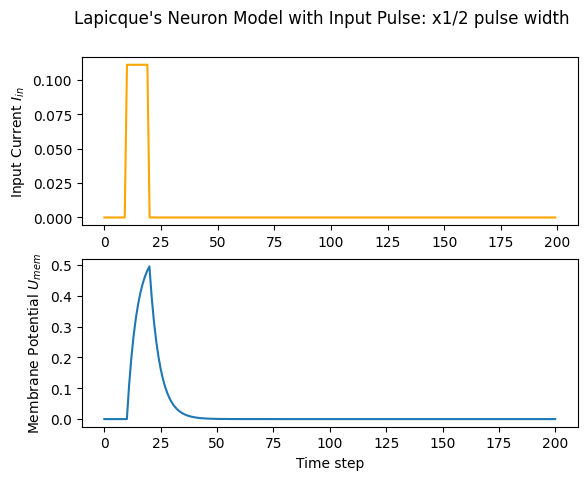

In [20]:
# now do approximately same charge in half the time.

# initialise current pulse, membrane, and outputs
cur_in2 = torch.cat((torch.zeros(10,1), torch.ones(10,1)*(0.111), torch.zeros(180,1)),0)
# input turns on at t=10, off at t=30
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec2 = [mem]

# neuron simulation

for step in range(num_steps):
    spk_out, mem = lif1(cur_in2[step], mem)
    mem_rec2.append(mem)

mem_rec2 = torch.stack(mem_rec2)

fig, axs = plt.subplots(2, 1)

axs[0].plot(cur_in2, color="orange")
axs[1].plot(mem_rec2)


axs[0].set_ylabel("Input Current $I_{in}$")

axs[1].set_ylabel("Membrane Potential $U_{mem}$")
axs[1].set_xlabel("Time step")

# axs[0].set_title("Lapicque's Neuron Model with Input Pulse: x1/2 pulse width")
fig.suptitle("Lapicque's Neuron Model with Input Pulse: x1/2 pulse width")

Text(0.5, 0.98, "Lapicque's Neuron Model with Input Pulse: x1/4 pulse width")

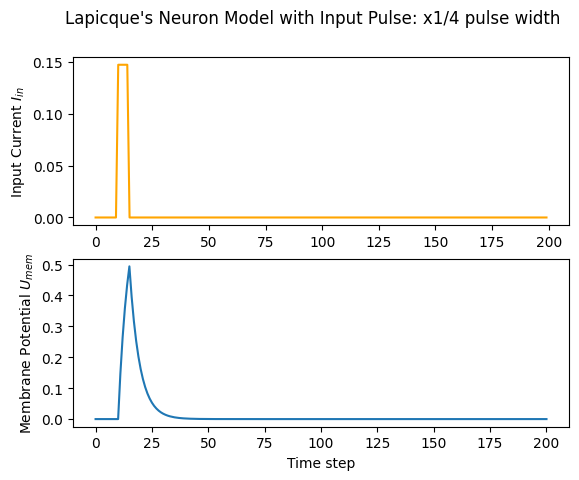

In [21]:
# now do same charge in half the time and half agian

# initialise current pulse, membrane, and outputs
cur_in3 = torch.cat((torch.zeros(10,1), torch.ones(5,1)*(0.147), torch.zeros(185,1)),0)
# input turns on at t=10, off at t=30
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec3 = [mem]

# neuron simulation

for step in range(num_steps):
    spk_out, mem = lif1(cur_in3[step], mem)
    mem_rec3.append(mem)

mem_rec3 = torch.stack(mem_rec3)

fig, axs = plt.subplots(2, 1)

axs[0].plot(cur_in3, color="orange")
axs[1].plot(mem_rec3)


axs[0].set_ylabel("Input Current $I_{in}$")

axs[1].set_ylabel("Membrane Potential $U_{mem}$")
axs[1].set_xlabel("Time step")

fig.suptitle("Lapicque's Neuron Model with Input Pulse: x1/4 pulse width")

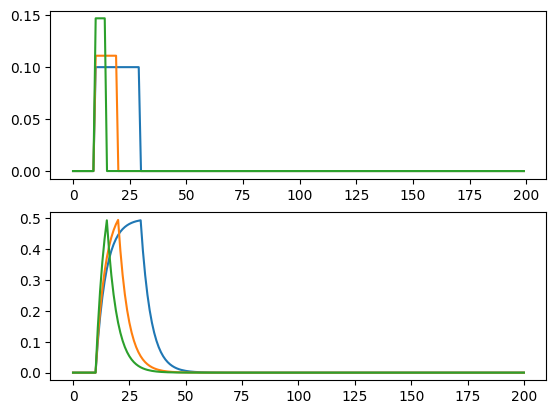

In [22]:
# now plot all 3


fig, axs = plt.subplots(2, 1)

axs[0].plot(cur_in1, label="input 1")
axs[0].plot(cur_in2, label="input 2")
axs[0].plot(cur_in3, label="input 3")

axs[1].plot(mem_rec1, label="response 1")
axs[1].plot(mem_rec2, label="response 2")
axs[1].plot(mem_rec3, label="response 3")



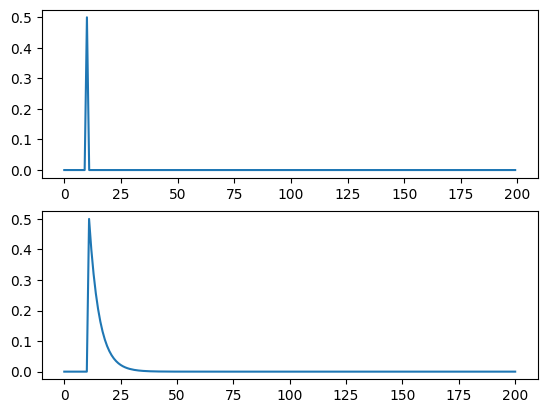

In [23]:
# Current spike input
cur_in4 = torch.cat((torch.zeros(10, 1), torch.ones(1, 1)*0.5, torch.zeros(189, 1)), 0)  # input only on for 1 time step
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec4 = [mem]

# neuron simulation
for step in range(num_steps):
  spk_out, mem = lif1(cur_in4[step], mem)
  mem_rec4.append(mem)
mem_rec4 = torch.stack(mem_rec4)

fig, axs = plt.subplots(2,1)
axs[0].plot(cur_in4)
axs[1].plot(mem_rec4)

 # Firing

In [24]:
# R=5.1, C=5e-3 for illustrative purposes
def leaky_integrate_and_fire(mem, cur=0, threshold=1, time_step=1e-3, R=5.1, C=5e-3, I=0):
    tau_mem = R*C
    spk = (mem > threshold) # if membrane exceeds threshold, spk=1, else 0
    # why does this above need brackets?
    mem = mem + (time_step/tau_mem*(-mem+R*cur))
    return mem, spk
    

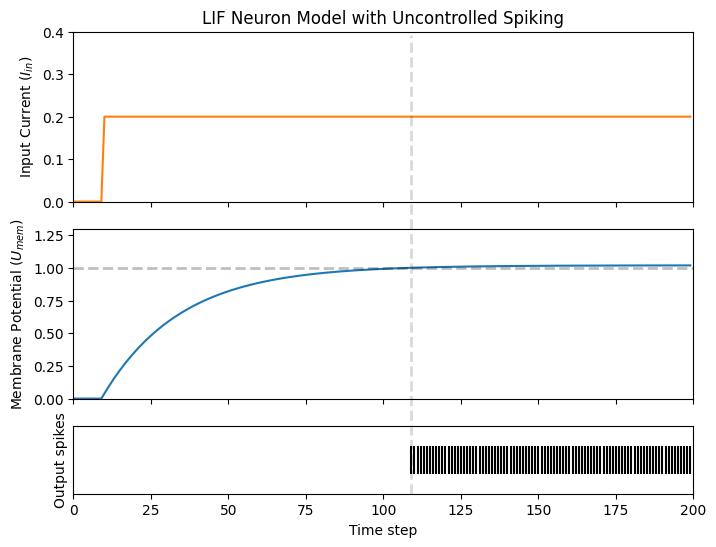

In [25]:
# so set threshold = 1 and apply a step current to get this neuron spiking

# small step current input

cur_in = torch.cat((torch.zeros(10,1), torch.ones(190,1)*0.2), 0)
mem = torch.zeros(1)

mem_rec = []
spk_rec = []

# neuron stimulation

for step in range(num_steps):
    mem, spk = leaky_integrate_and_fire(mem, cur_in[step])
    mem_rec.append(mem)
    spk_rec.append(spk)

# convert lists to tensors

mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)


plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line=1, vline=109, ylim_max2=1.3, title="LIF Neuron Model with Uncontrolled Spiking")

In [26]:
# R=5.1, C=5e-3 for illustrative purposes
# this time define a reset mechanism
def leaky_integrate_and_fire(mem, cur=0, threshold=1, time_step=1e-3, R=5.1, C=5e-3, I=0):
    tau_mem = R*C
    spk = (mem > threshold) # if membrane exceeds threshold, spk=1, else 0
    # why does this above need brackets?
    mem = mem + (time_step/tau_mem)*(-mem+R*cur) - spk*threshold
    return mem, spk


# so set threshold = 1 and apply a step current to get this neuron spiking


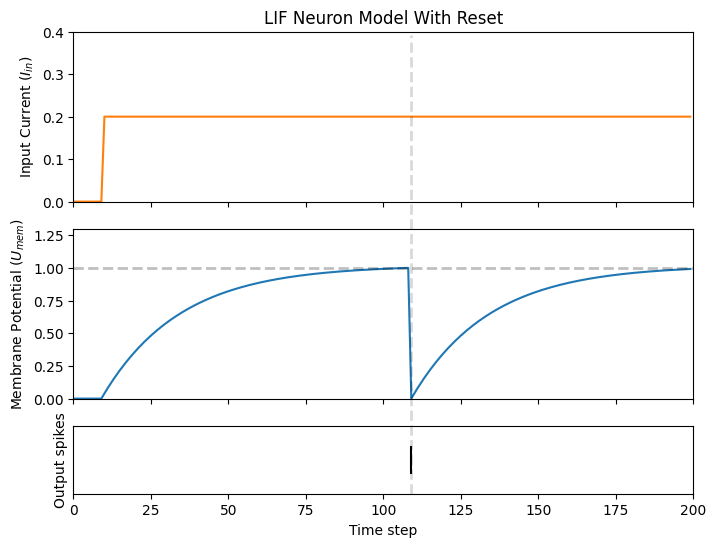

In [27]:
# Small step current input
cur_in = torch.cat((torch.zeros(10), torch.ones(190)*0.2), 0)
mem = torch.zeros(1)
mem_rec = []
spk_rec = []

# neuron simulation
for step in range(num_steps):
  mem, spk = leaky_integrate_and_fire(mem, cur_in[step])
  mem_rec.append(mem)
  spk_rec.append(spk)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line=1, vline=109, ylim_max2=1.3,
                 title="LIF Neuron Model With Reset")

In [28]:
print(spk_rec[105:115].view(-1))

tensor([False, False, False, False,  True, False, False, False, False, False])


In [29]:
# Create the same neuron as before using snnTorch
lif2 = snn.Lapicque(R=5.1, C=5e-3, time_step=1e-3)

print(f"Membrane potential time constant: {lif2.R * lif2.C:.3f}s")
"Membrane potential time constant: 0.025s"

Membrane potential time constant: 0.025s


'Membrane potential time constant: 0.025s'

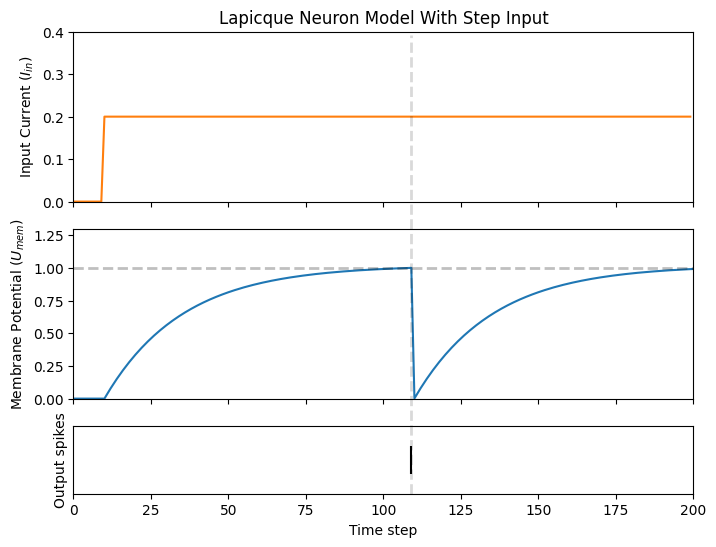

In [30]:
# Initialize inputs and outputs
cur_in = torch.cat((torch.zeros(10, 1), torch.ones(190, 1)*0.2), 0)
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]   

# Simulation run across 100 time steps.
for step in range(num_steps):
  spk_out, mem = lif2(cur_in[step], mem)
  mem_rec.append(mem)
  spk_rec.append(spk_out)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line=1, vline=109, ylim_max2=1.3,
                 title="Lapicque Neuron Model With Step Input")

In [31]:
print(spk_rec[105:115].view(-1))

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


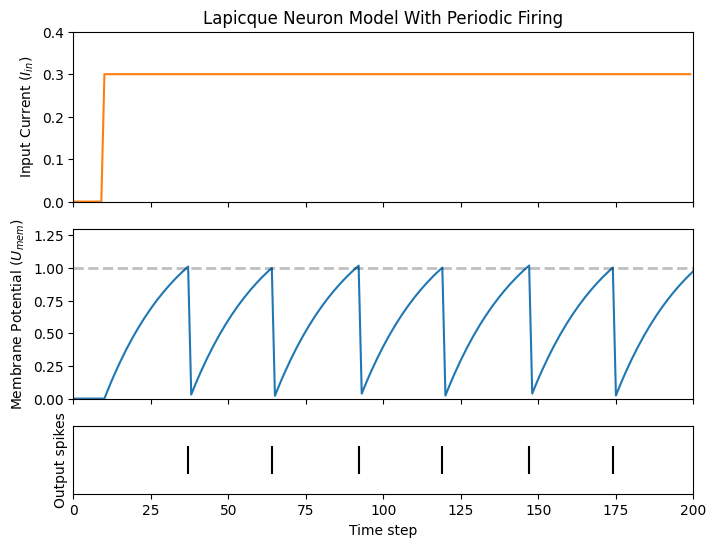

In [32]:
# Initialize inputs and outputs
cur_in = torch.cat((torch.zeros(10, 1), torch.ones(190, 1)*0.3), 0)  # increased current
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# neuron simulation
for step in range(num_steps):
  spk_out, mem = lif2(cur_in[step], mem)
  mem_rec.append(mem)
  spk_rec.append(spk_out)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)


plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line=1, ylim_max2=1.3,
                 title="Lapicque Neuron Model With Periodic Firing")

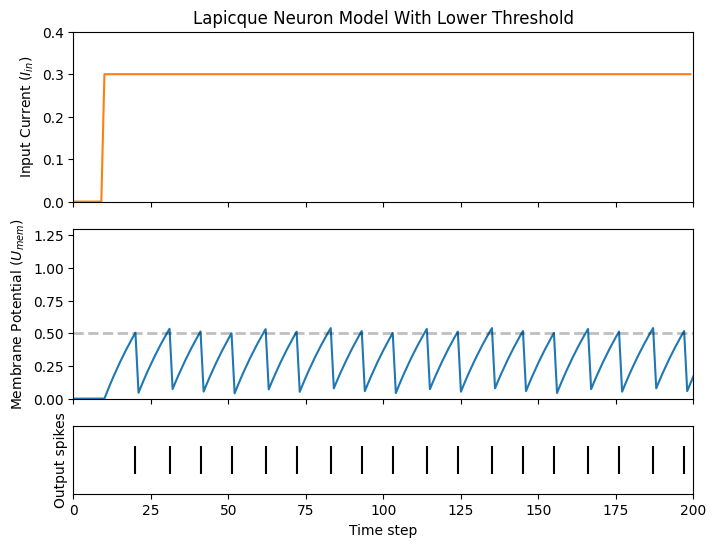

In [33]:
# neuron with halved threshold
lif3 = snn.Lapicque(R=5.1, C=5e-3, time_step=1e-3, threshold=0.5)

# Initialize inputs and outputs
cur_in = torch.cat((torch.zeros(10, 1), torch.ones(190, 1)*0.3), 0)
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Neuron simulation
for step in range(num_steps):
  spk_out, mem = lif3(cur_in[step], mem)
  mem_rec.append(mem)
  spk_rec.append(spk_out)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line=0.5, ylim_max2=1.3,
                 title="Lapicque Neuron Model With Lower Threshold")

In [34]:
spk_in = spikegen.rate_conv(torch.ones((num_steps,1))*0.40)

In [35]:
print(f"There are {int(sum(spk_in))} total spikes out of {len(spk_in)} time steps.")

There are 61 total spikes out of 200 time steps.


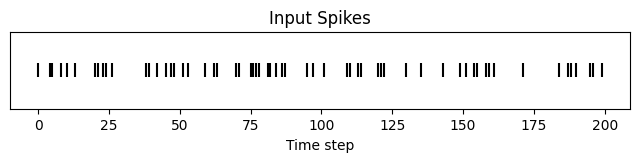

In [36]:
fig = plt.figure(facecolor="w", figsize=(8, 1))
ax = fig.add_subplot(111)

splt.raster(spk_in.reshape(num_steps, -1), ax, s=100, c="black", marker="|")
plt.title("Input Spikes")
plt.xlabel("Time step")
plt.yticks([])
plt.show()

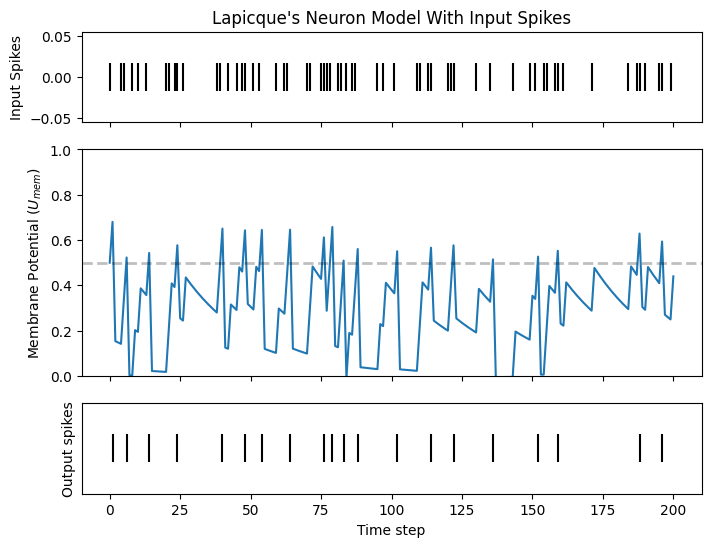

In [37]:
# Initialize inputs and outputs
mem = torch.ones(1)*0.5
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Neuron simulation
for step in range(num_steps):
  spk_out, mem = lif3(spk_in[step], mem)
  spk_rec.append(spk_out)
  mem_rec.append(mem)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_spk_mem_spk(spk_in, mem_rec, spk_rec, "Lapicque's Neuron Model With Input Spikes")

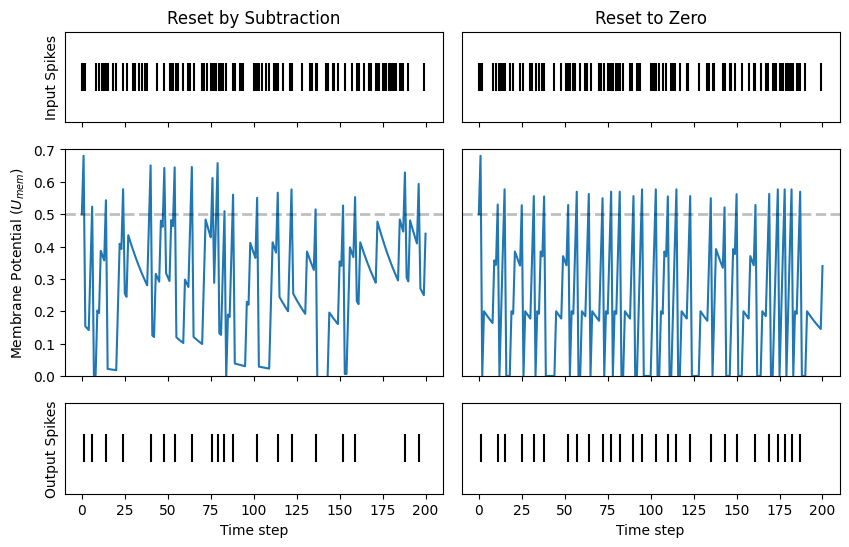

In [38]:
# Neuron with reset_mechanism set to "zero"
lif4 = snn.Lapicque(R=5.1, C=5e-3, time_step=1e-3, threshold=0.5, reset_mechanism="zero")

# Initialize inputs and outputs
spk_in = spikegen.rate_conv(torch.ones((num_steps, 1)) * 0.40)
mem = torch.ones(1)*0.5
spk_out = torch.zeros(1)
mem_rec0 = [mem]
spk_rec0 = [spk_out]

# Neuron simulation
for step in range(num_steps):
  spk_out, mem = lif4(spk_in[step], mem)
  spk_rec0.append(spk_out)
  mem_rec0.append(mem)

# convert lists to tensors
mem_rec0 = torch.stack(mem_rec0)
spk_rec0 = torch.stack(spk_rec0)

plot_reset_comparison(spk_in, mem_rec, spk_rec, mem_rec0, spk_rec0)